In [3]:
import pandas as pd
import numpy as np


# Create a sample dataset with missing values
data = {
    'A': [1, 2, 100, 4, 5],
    'B': [3, np.nan, 7, 8, 9],
    'C': [np.nan, 12, 13, 14, 15],
    'D': [16, 17, 18, np.nan, 20]
}


# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

Original DataFrame:
     A    B     C     D
0    1  3.0   NaN  16.0
1    2  NaN  12.0  17.0
2  100  7.0  13.0  18.0
3    4  8.0  14.0   NaN
4    5  9.0  15.0  20.0


In [7]:
df.isnull().sum()

A    0
B    1
C    1
D    1
dtype: int64

In [9]:
# dropping rows with null values
df.dropna()

,A,B,C,D
2,100,7.0,13.0,18.0
4,5,9.0,15.0,20.0


In [13]:
# dropping cols with null value
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [17]:
#impute with mean value
df["B"].fillna(df["B"].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [19]:
#impute with median value
df["B"].fillna(df["B"].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [23]:
#impute with random/0 value
df["B"].fillna(0)

0    3.0
1    0.0
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [27]:
import seaborn as sns
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
df.dropna().shape

(182, 15)

In [35]:
# imputation of missing value 
# age is misiing at random value assume


<Axes: xlabel='age', ylabel='Count'>

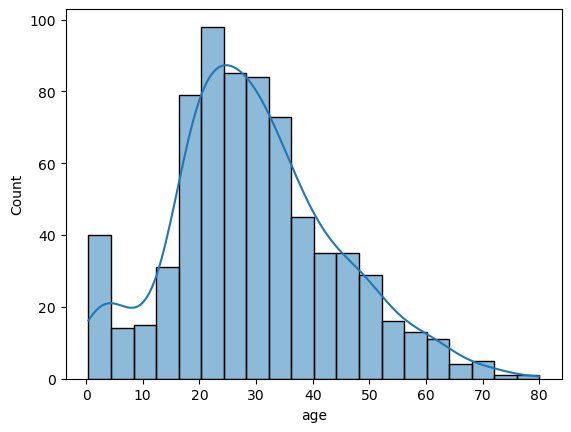

In [39]:
sns.histplot(df.age,kde=True)

In [41]:
# whenever you have normal ditribution impute with mean 
df["imputed_ageMean"]=df["age"].fillna(df.age.mean())

In [51]:
df[["age","imputed_ageMean"]]

,age,imputed_ageMean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


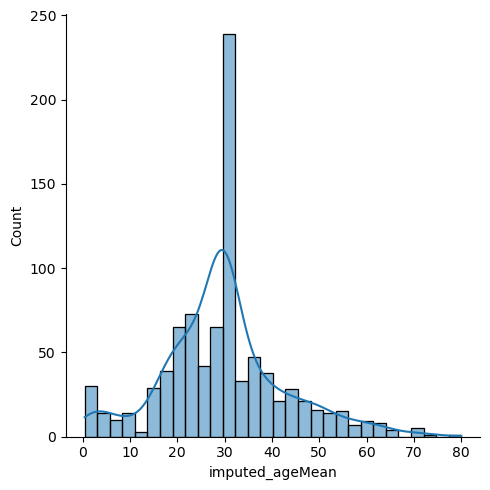

In [56]:
# sns.distplot(df["imputed_ageMean"],kde=True) use dis plot new syntax
sns.displot(df["imputed_ageMean"],kde=True) 

In [58]:
# mean imputation work for  normally distributted data eith no outliers in data 

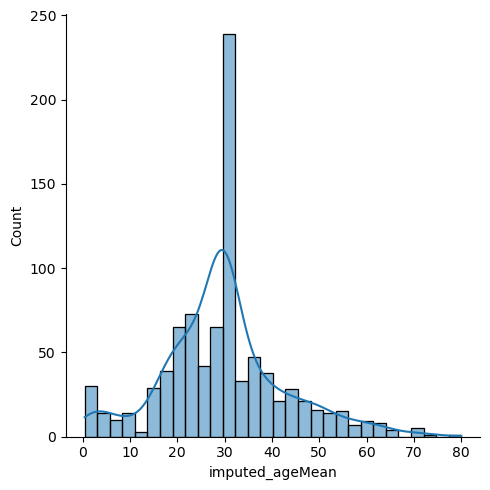

In [60]:
# median imputation
df["imputed_ageMedian"]=df["age"].fillna(df.age.median())


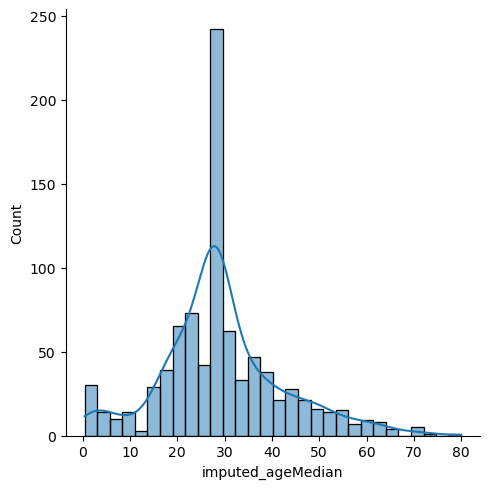

In [62]:
sns.displot(df["imputed_ageMedian"],kde=True) 

In [66]:
# imputation of categorical data 
df["embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [68]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [72]:
df[df["embarked"].isnull()] # missing completely at random 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,imputed_ageMean,imputed_ageMedian
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [74]:
# how many not null value 
df.notna().sum()

survived             891
pclass               891
sex                  891
age                  714
sibsp                891
parch                891
fare                 891
embarked             889
class                891
who                  891
adult_male           891
deck                 203
embark_town          889
alive                891
alone                891
imputed_ageMean      891
imputed_ageMedian    891
dtype: int64

In [78]:
df[df["embarked"].notna()]["embarked"].mode() #s

0    S
Name: embarked, dtype: object

In [86]:
df["imputed_embarked"]=df["embarked"].fillna("s")
df[["embarked","imputed_embarked"]].isnull().sum()

embarked            2
imputed_embarked    0
dtype: int64